In [71]:
import gzip
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product
import numpy as np
from random import sample
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
color = sns.color_palette()


In [2]:
# The pickle database is already formated as to output training, validation and test sets.
# We first uncompress on the file to avoid keeping the uncompressed database on disk
pkl_file = gzip.open('Data/mnist.pkl.gz')
train_set, validation_set, test_set = pickle.load(pkl_file, encoding='latin1')
pkl_file.close()

# Now we create a single data set from all three subsets
X = np.concatenate([train_set[0], validation_set[0], test_set[0]])
y = np.concatenate([train_set[1], validation_set[1], test_set[1]])

In [25]:
y = np.concatenate([train_set[1], validation_set[1], test_set[1]])
y_sample = sample(list(y), int(len(y)/2))

In [31]:
np.size(y_sample)

35000

In [3]:
X_sample = sample(list(X), int(len(X)/2))

In [4]:
gamma_param = [1, 10, 50, 100, 1000]

for _, g in enumerate(gamma_param):
    kpca = KernelPCA(n_components=10, kernel='rbf', gamma=g, fit_inverse_transform=True)
    X_reduced = kpca.fit_transform(X_sample)
    X_preimage = kpca.inverse_transform(X_reduced)
    print("Gamma: ", g)
    print("MSE: ", mean_squared_error(X_sample, X_preimage))

Gamma:  1
MSE:  0.06604266
Gamma:  10
MSE:  0.06667434
Gamma:  50
MSE:  0.066657566
Gamma:  100
MSE:  0.066653244
Gamma:  1000
MSE:  0.066635445


In [5]:
kpca = KernelPCA(n_components=10, kernel='rbf', gamma=1, fit_inverse_transform=True)
X_reduced = kpca.fit_transform(X_sample)
X_preimage = kpca.inverse_transform(X_reduced)

In [125]:
kpca_1 = KernelPCA(n_components=10, kernel='rbf', gamma=1, fit_inverse_transform=True)
X_reduced_1 = kpca_1.fit_transform(X_array)
X_preimage_1 = kpca_1.inverse_transform(X_reduced_1)

MemoryError: Unable to allocate array with shape (35000, 35000) and data type float32

In [119]:
print('Original number of features:', len(X_sample))
print('Reduced number of features:', X_reduced.shape[1])

Original number of features: 35000
Reduced number of features: 10


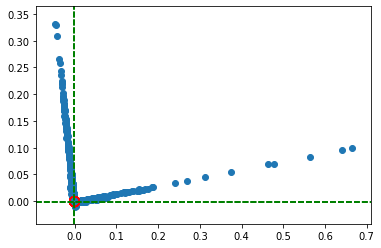

In [115]:
# Identify the 5%, 25%, 50%, 75%, 95% quantiles along both components
pc1 = X_reduced[:,0]
pc2 = X_reduced[:,1]

# Exact quantiles
qt1 = np.quantile(pc1, [0.05, 0.25, 0.5, 0.75, 0.95])
qt2 = np.quantile(pc2, [0.95, 0.75, 0.5, 0.25, 0.05])

# Plotting the first two principal components
plt.scatter(X_reduced[:,0], X_reduced[:,1])
# Quantile grid
for val in qt1:
    plt.axvline(val, color='green', linestyle='--')
for val in qt2:
    plt.axhline(val, color='green', linestyle='--')

# Nearest points to quantiles
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)
# Create list of nearest points starting at top left corner
examples = []
for (y, x) in product(qt2, qt1):
    closest = closest_node((x, y), list(zip(pc1, pc2)))
    examples.append(closest)
    plt.scatter(pc1[closest], pc2[closest], facecolors='none', edgecolors='r', s=100)

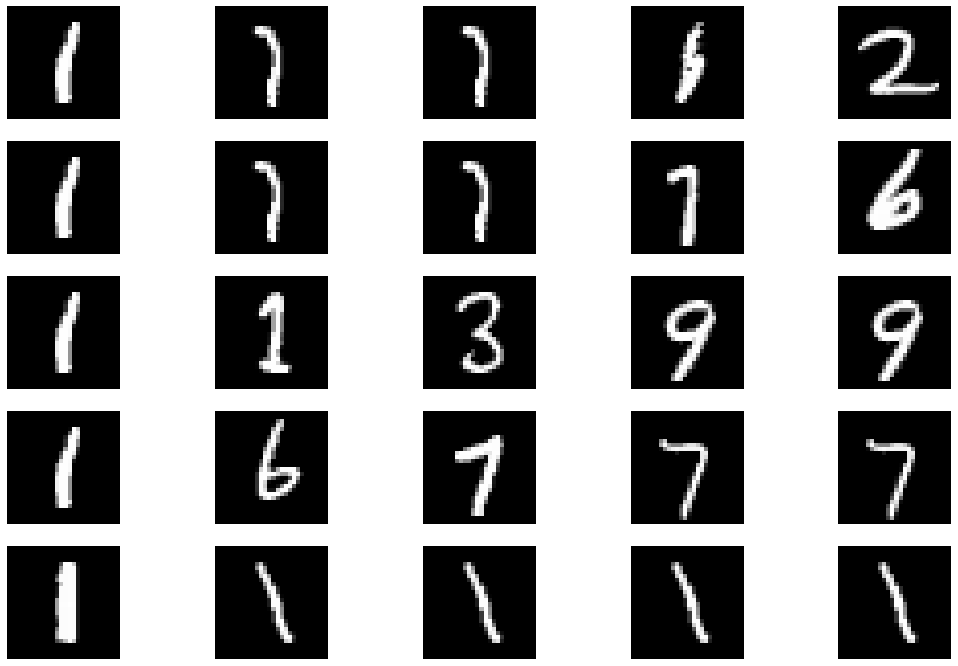

In [118]:
examples = np.array(examples).reshape(5,5)
X_array = np.array(X_sample)
fig, ax = plt.subplots(5, 5, figsize=(18,12))
for i, j in product(range(5), range(5)):
    image = X_array[examples[i][j],:].reshape([28, 28])
    ax[i][j].axis('off')
    ax[i][j].imshow(image, cmap=plt.get_cmap('gray'))

In [83]:
def scatterPlot(xDF, yDF, algoName):
    # Creating a dataframe to easily plot the sample label
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Component", "Second Component", "Label"]
    sns.lmplot(x="First Component", y="Second Component", hue="Label", \
               data=tempDF, fit_reg=False)  
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

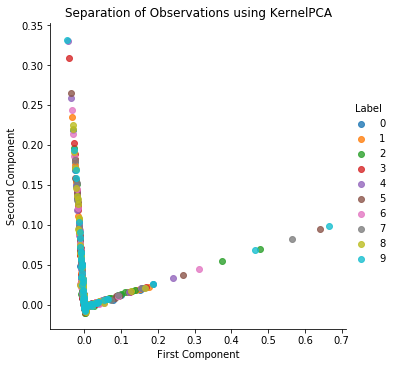

In [84]:
X_index = range(0, len(X_sample))
X_df = pd.DataFrame(data=X_reduced,index=X_index)
y_df = pd.Series(data=y_sample,index=X_index)

scatterPlot(X_df, y_df, "KernelPCA")

In [ ]:

"""
df = pd.DataFrame(np.concatenate((X_reduced, np.reshape(y_sample, (-1, 1))), axis=1))

    # Plot the projected points and show the evaluation score
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_sample, s=20, cmap='Set1')
plt.colorbar()
# Label the data distributions
for i, number in enumerate(y_sample):
    plt.annotate(number,
                 df.loc[df[2]==number,[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 weight='bold',
                 size='20')
    
plt.show()
"""

In [109]:
def scatterPlot3D(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:2], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Component", "Second Component", "Third Component", "Label"]
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    xs = tempDF['First Component']
    ys = tempDF['Second Component']
    zs = tempDF['Third Component']
    c = tempDF['Label']
    ax.scatter(xs, ys, zs, c=c, s=50, alpha=0.6, edgecolors='w')
    ax.set_xlabel('First Component')
    ax.set_ylabel('Second Component')
    ax.set_zlabel('Third Component')
    ax.set_title("Separation of Observations using "+algoName)
    plt.show()

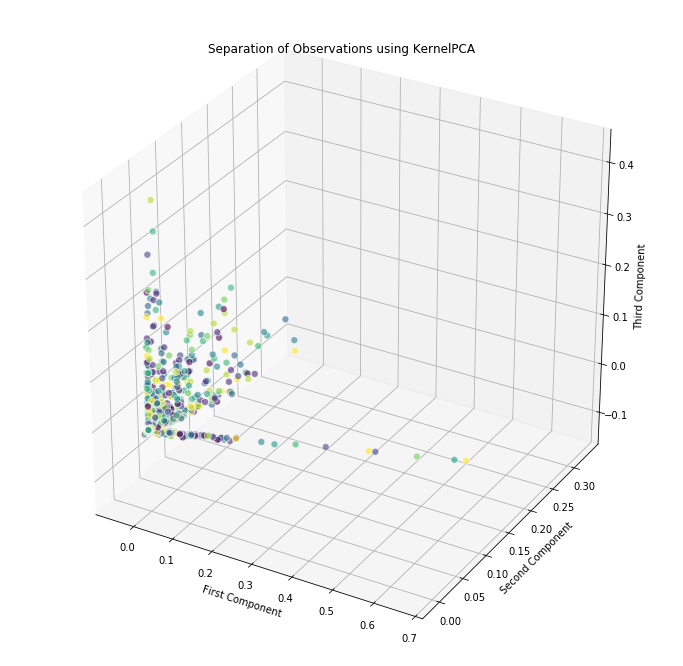

In [110]:
scatterPlot3D(X_df, y_df, "KernelPCA")